In [ ]:
!pip install pandas==1.0.1

     |████████████████████████████████| 10.1 MB 3.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.1 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 1.0.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.__version__

'1.0.1'

In [ ]:
pd.options.display.float_format='{:,.3f}'.format

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3
240,27.180,2.000,Female,Yes,Sat,Dinner,2
241,22.670,2.000,Male,Yes,Sat,Dinner,2
242,17.820,1.750,Male,No,Sat,Dinner,2


In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.000
unique,nan,nan,2,2,4,2,nan
top,nan,nan,Male,No,Sat,Dinner,nan
freq,nan,nan,157,151,87,176,nan
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000


In [ ]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
df['day'].value_counts() / df['day'].value_counts().sum() * 100 #porcentaje de ventas de comida por el días

Sat    35.656
Sun    31.148
Thur   25.410
Fri     7.787
Name: day, dtype: float64

In [ ]:







df.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744,3.090,2.631
Female,18.057,2.833,2.460


In [ ]:
df['prct_tip'] = df['tip']/df['total_bill'] * 100
df


,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.990,1.010,Female,No,Sun,Dinner,2,5.945
1,10.340,1.660,Male,No,Sun,Dinner,3,16.054
2,21.010,3.500,Male,No,Sun,Dinner,3,16.659
3,23.680,3.310,Male,No,Sun,Dinner,2,13.978
4,24.590,3.610,Female,No,Sun,Dinner,4,14.681
...,...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3,20.393
240,27.180,2.000,Female,Yes,Sat,Dinner,2,7.358
241,22.670,2.000,Male,Yes,Sat,Dinner,2,8.822
242,17.820,1.750,Male,No,Sat,Dinner,2,9.820


In [ ]:


df.groupby('sex').mean()

,total_bill,tip,size,prct_tip
sex,,,,
Male,20.744,3.090,2.631,15.765
Female,18.057,2.833,2.460,16.649


In [ ]:
df.groupby('sex').median()

,total_bill,tip,size,prct_tip
sex,,,,
Male,18.350,3.000,2,15.349
Female,16.400,2.750,2,15.558


In [ ]:
df.groupby('sex')[['total_bill','prct_tip']].describe()

total_bill                            ... prct_tip                            
            count   mean   std   min    25%  ...      min    25%    50%    75%    max
sex                                          ...                                     
Male      157.000 20.744 9.246 7.250 14.000  ...    3.564 12.139 15.349 18.624 71.034
Female     87.000 18.057 8.009 3.070 12.750  ...    5.643 14.042 15.558 19.427 41.667

[2 rows x 16 columns]

In [ ]:
def convert_eur2usd(x):
  return np.mean(x)*1.12

In [ ]:
df.groupby(['sex','time'])[['total_bill','prct_tip']].apply(convert_eur2usd)

total_bill  prct_tip
sex    time                        
Male   Lunch       20.214    18.601
       Dinner      24.037    17.406
Female Lunch       18.300    18.176
       Dinner      21.519    18.964

In [ ]:
df.groupby(['sex','time'])[['total_bill','prct_tip']].apply(np.std)

total_bill  prct_tip
sex    time                        
Male   Lunch        7.832     4.503
       Dinner       9.423     6.867
Female Lunch        7.393     3.437
       Dinner       8.123     6.279

In [ ]:
df.groupby(['sex','time'])[['total_bill','prct_tip']].apply(lambda x: np.mean(x)*1.12)

total_bill  prct_tip
sex    time                        
Male   Lunch       20.214    18.601
       Dinner      24.037    17.406
Female Lunch       18.300    18.176
       Dinner      21.519    18.964

In [ ]:
df.groupby(['sex','time'])[['total_bill','prct_tip']].agg([np.mean,np.max])

total_bill        prct_tip       
                    mean   amax     mean   amax
sex    time                                    
Male   Lunch      18.048 41.190   16.608 26.631
       Dinner     21.461 50.810   15.541 71.034
Female Lunch      16.339 43.110   16.228 25.931
       Dinner     19.213 44.300   16.932 41.667

In [ ]:
df['ones']= 1 #Otra forma de saber cuantas personas fuman o no sin necesidad de crear una nueva columna ones es mediante: df[["sex","smoker"]].value_counts().to_frame()



In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones
0,16.990,1.010,Female,No,Sun,Dinner,2,5.945,1
1,10.340,1.660,Male,No,Sun,Dinner,3,16.054,1
2,21.010,3.500,Male,No,Sun,Dinner,3,16.659,1
3,23.680,3.310,Male,No,Sun,Dinner,2,13.978,1
4,24.590,3.610,Female,No,Sun,Dinner,4,14.681,1
...,...,...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3,20.393,1
240,27.180,2.000,Female,Yes,Sat,Dinner,2,7.358,1
241,22.670,2.000,Male,Yes,Sat,Dinner,2,8.822,1
242,17.820,1.750,Male,No,Sat,Dinner,2,9.820,1


In [ ]:
df_g = df.groupby(['sex','smoker'])[['ones']].sum()
df_g

ones
sex    smoker      
Male   Yes       60
       No        97
Female Yes       33
       No        54

In [ ]:
df_g.groupby(level=0).apply(lambda x : x / x.sum()*100) #así obtengo el promedio de fumadores

ones
sex    smoker       
Male   Yes    38.217
       No     61.783
Female Yes    37.931
       No     62.069

In [ ]:
pd.cut(df['total_bill'],bins= 3) #ayuda a serpaar los valores del df en categorías de intervalos


0       (3.022, 18.983]
1       (3.022, 18.983]
2      (18.983, 34.897]
3      (18.983, 34.897]
4      (18.983, 34.897]
             ...       
239    (18.983, 34.897]
240    (18.983, 34.897]
241    (18.983, 34.897]
242     (3.022, 18.983]
243     (3.022, 18.983]
Name: total_bill, Length: 244, dtype: category
Categories (3, interval[float64]): [(3.022, 18.983] < (18.983, 34.897] < (34.897, 50.81]]

In [ ]:
pd.cut(df['total_bill'],bins= 3).value_counts() #me indica cuantos valores están están dentro de una categoría, en este caso se trata del total de la factura

(3.022, 18.983]     140
(18.983, 34.897]     88
(34.897, 50.81]      16
Name: total_bill, dtype: int64

In [ ]:
#si deseo colocar los intervalos donde quiero las categorías afecto al argumento bins con una lista
pd.cut(df['total_bill'],bins= [0,17,35,70]).value_counts()


(17, 35]    115
(0, 17]     113
(35, 70]     16
Name: total_bill, dtype: int64

In [ ]:
df['bin_total']= pd.cut(df['total_bill'],bins= [0,17,35,70])
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.990,1.010,Female,No,Sun,Dinner,2,5.945,1,"(0, 17]"
1,10.340,1.660,Male,No,Sun,Dinner,3,16.054,1,"(0, 17]"
2,21.010,3.500,Male,No,Sun,Dinner,3,16.659,1,"(17, 35]"
3,23.680,3.310,Male,No,Sun,Dinner,2,13.978,1,"(17, 35]"
4,24.590,3.610,Female,No,Sun,Dinner,4,14.681,1,"(17, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3,20.393,1,"(17, 35]"
240,27.180,2.000,Female,Yes,Sat,Dinner,2,7.358,1,"(17, 35]"
241,22.670,2.000,Male,Yes,Sat,Dinner,2,8.822,1,"(17, 35]"
242,17.820,1.750,Male,No,Sat,Dinner,2,9.820,1,"(17, 35]"


In [ ]:
df.groupby(['time','bin_total'])[['ones']].count() #así tenemos la cantidad de facturas en los intervalos de valor que se venden según los horarios de comidas, por ejemplo tenemos que entre 0 y 17 dolares se venden 43 comidas en el almuerzo

ones
time   bin_total      
Lunch  (0, 17]      43
       (17, 35]     23
       (35, 70]      2
Dinner (0, 17]      70
       (17, 35]     92
       (35, 70]     14

In [ ]:
#si queremos la misma accion que la anterior pero en porcentajes la agregamos el landa que ya hemos usado
df.groupby(['time','bin_total'])[['ones']].count().groupby(level=0).apply(lambda x : x / x.sum()*100)

ones
time   bin_total       
Lunch  (0, 17]   63.235
       (17, 35]  33.824
       (35, 70]   2.941
Dinner (0, 17]   39.773
       (17, 35]  52.273
       (35, 70]   7.955

### ***Pivot***

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.990,1.010,Female,No,Sun,Dinner,2,5.945,1,"(0, 17]"
1,10.340,1.660,Male,No,Sun,Dinner,3,16.054,1,"(0, 17]"
2,21.010,3.500,Male,No,Sun,Dinner,3,16.659,1,"(17, 35]"
3,23.680,3.310,Male,No,Sun,Dinner,2,13.978,1,"(17, 35]"
4,24.590,3.610,Female,No,Sun,Dinner,4,14.681,1,"(17, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3,20.393,1,"(17, 35]"
240,27.180,2.000,Female,Yes,Sat,Dinner,2,7.358,1,"(17, 35]"
241,22.670,2.000,Male,Yes,Sat,Dinner,2,8.822,1,"(17, 35]"
242,17.820,1.750,Male,No,Sat,Dinner,2,9.820,1,"(17, 35]"


In [ ]:
df.groupby(['sex','time'])[['total_bill']].mean()

total_bill
sex    time              
Male   Lunch       18.048
       Dinner      21.461
Female Lunch       16.339
       Dinner      19.213

In [ ]:
df_gp= df.groupby(['sex','time'])[['total_bill']].mean().reset_index()
df_gp

,sex,time,total_bill
0,Male,Lunch,18.048
1,Male,Dinner,21.461
2,Female,Lunch,16.339
3,Female,Dinner,19.213


In [ ]:
df_gp.pivot_table(values='total_bill',index='sex',columns='time')

time,Lunch,Dinner
sex,,
Male,18.048,21.461
Female,16.339,19.213


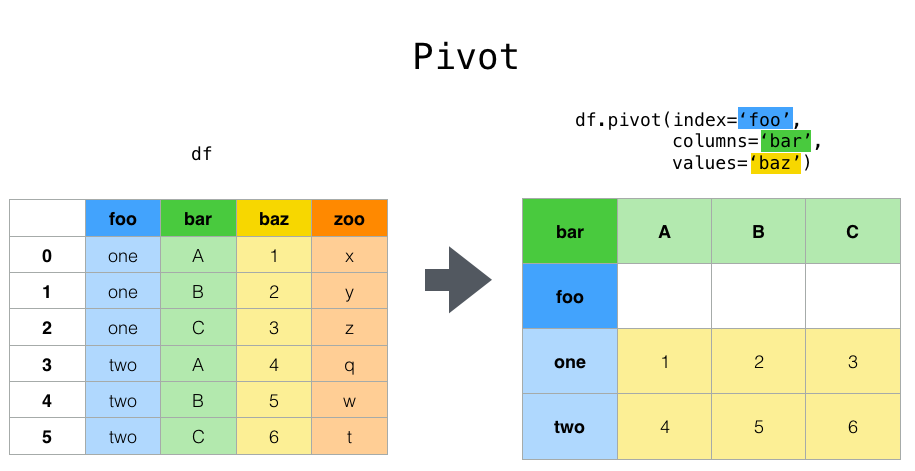

In [ ]:
df_pivot=df.pivot_table(values='total_bill',index='sex',columns='time', aggfunc=[np.median,np.std]) #la func anterior calcula el promedio, se puede cambiar la guncion con el argumento aggfunc


In [ ]:
df_pivot.unstack()

        time    sex   
median  Lunch   Male     16.580
                Female   13.420
        Dinner  Male     19.630
                Female   17.190
std     Lunch   Male      7.953
                Female    7.501
        Dinner  Male      9.461
                Female    8.202
dtype: float64

In [38]:
df_pivot.unstack().reset_index()

,level_0,time,sex,0
0,median,Lunch,Male,16.580
1,median,Lunch,Female,13.420
2,median,Dinner,Male,19.630
3,median,Dinner,Female,17.190
4,std,Lunch,Male,7.953
5,std,Lunch,Female,7.501
6,std,Dinner,Male,9.461
7,std,Dinner,Female,8.202
